In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.optimizers import SGD, adam
import scipy.io as sio
import loss.my_loss as my_loss

Using TensorFlow backend.


In [2]:
training_set = {}
training_set['received'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\train_received')['received_set']
training_set['clean'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\train_clean')['clean_set']
training_set['snr'] = sio.loadmat('.\\data\\denoise_set\\sps_4\\train_snr')['snr_set']

In [3]:
x = np.zeros([training_set['received'].shape[0],2,training_set['received'].shape[1]])
x[:,0,:]=np.real(training_set['received'])
x[:,1,:]=np.imag(training_set['received'])
y = np.zeros([training_set['received'].shape[0],2,training_set['received'].shape[1]])
y[:,0,:]=np.real(training_set['clean'])
y[:,1,:]=np.imag(training_set['clean'])
x = x.astype(np.float32)
y = y.astype(np.float32)

In [4]:
out_shape = list(x.shape)
inp_shape = np.append(out_shape, 1)
x = x.reshape(inp_shape)
y = y.reshape(inp_shape)
print(x.shape)

(20000, 2, 1024, 1)


In [5]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, ReduceLROnPlateau, TensorBoard, EarlyStopping
lr_decay = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=3, verbose=1, min_lr=1e-6, mode='min')
early_stopping = EarlyStopping(monitor='loss', patience=6, verbose=1, mode='min')
callback_list = [lr_decay, early_stopping] 

In [6]:
import model.ddn as my_model
model = my_model.resnet_buttleneck()
# model.summary()

D:\python-wing-personal\script\MR_4\model\ddn.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 4), padding="same", kernel_initializer="he_normal", activation=None, strides=(1, 1), name="input_layer")`
  name='input_layer', padding='same', activation=None)(inp)
D:\python-wing-personal\script\MR_4\model\ddn.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, padding="same", kernel_size=(1, 1), strides=(1, 1), kernel_initializer="he_normal", activation=None, name="bblock_1_conv_1")`
  name=name+'_conv_1', padding='same', activation=None)(inp)
D:\python-wing-personal\script\MR_4\model\ddn.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, padding="same", kernel_size=(1, 4), strides=(1, 1), kernel_initializer="he_normal", activation=None, name="bblock_1_conv_2")`
  name=name+'_conv_2', padding='same', activation=None)(out)
D:\python-wing-personal\script\MR_4\model\ddn.py:37: UserWarning: Update your `Conv2

In [7]:
from loss.my_loss import sqrt_evm_loss
model.compile(loss=sqrt_evm_loss,
                      optimizer='adam',
                      metrics={'output_layer':sqrt_evm_loss})

In [8]:
x_train = x[:18000]
y_train = y[:18000]
x_val = x[18000:]
y_val = y[18000:]

In [9]:
history1 = model.fit(x=x_train, y=y_train,
                    epochs=50,
                    batch_size=32,
                    verbose=1,
                    validation_data=(x_val, y_val,),
                    callbacks=callback_list)
model.save_weights('.\\weights\\ResNet_32_sqrtevmloss.h5')

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 86s - loss: 7.8996 - val_loss: 4.5950
Epoch 2/50
18000/18000 [==============================] - 81s - loss: 3.8310 - val_loss: 2.9981
Epoch 3/50
18000/18000 [==============================] - 82s - loss: 3.3660 - val_loss: 2.9634
Epoch 4/50
18000/18000 [==============================] - 81s - loss: 3.2931 - val_loss: 2.9099
Epoch 5/50
18000/18000 [==============================] - 81s - loss: 3.2922 - val_loss: 2.8849
Epoch 6/50
18000/18000 [==============================] - 81s - loss: 3.2403 - val_loss: 2.8692
Epoch 7/50
18000/18000 [==============================] - 81s - loss: 3.2541 - val_loss: 2.8612
Epoch 8/50
18000/18000 [==============================] - 81s - loss: 3.2281 - val_loss: 2.8574
Epoch 9/50
18000/18000 [==============================] - 81s - loss: 3.2392 - val_loss: 2.8491
Epoch 10/50
18000/18000 [==============================] - 81s - loss: 3.2318 - val_los

In [11]:
import model.ddn as my_model
model_3 = my_model.resnet_buttleneck()
from loss.my_loss import evm_loss
model_3.compile(loss=evm_loss,
                      optimizer='adam',
                      metrics={'output_layer':evm_loss})
history3 = model_3.fit(x=x_train, y=y_train,
                    epochs=50,
                    batch_size=32,
                    verbose=1,
                    validation_data=(x_val, y_val),
                    callbacks=callback_list)
model_3.save_weights('.\\weights\\ResNet_32_evmloss.h5')

D:\python-wing-personal\script\MR_4\model\ddn.py:75: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (1, 4), padding="same", kernel_initializer="he_normal", activation=None, strides=(1, 1), name="input_layer")`
  name='input_layer', padding='same', activation=None)(inp)
D:\python-wing-personal\script\MR_4\model\ddn.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, padding="same", kernel_size=(1, 1), strides=(1, 1), kernel_initializer="he_normal", activation=None, name="bblock_1_conv_1")`
  name=name+'_conv_1', padding='same', activation=None)(inp)
D:\python-wing-personal\script\MR_4\model\ddn.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, padding="same", kernel_size=(1, 4), strides=(1, 1), kernel_initializer="he_normal", activation=None, name="bblock_1_conv_2")`
  name=name+'_conv_2', padding='same', activation=None)(out)
D:\python-wing-personal\script\MR_4\model\ddn.py:37: UserWarning: Update your `Conv2

Train on 18000 samples, validate on 2000 samples
Epoch 1/50
18000/18000 [==============================] - 85s - loss: 294.0358 - val_loss: 108.5240
Epoch 2/50
18000/18000 [==============================] - 81s - loss: 50.0117 - val_loss: 20.3083
Epoch 3/50
18000/18000 [==============================] - 81s - loss: 22.1789 - val_loss: 14.3670
Epoch 4/50
18000/18000 [==============================] - 81s - loss: 21.4922 - val_loss: 14.1471
Epoch 5/50
18000/18000 [==============================] - 81s - loss: 20.8624 - val_loss: 14.0106
Epoch 6/50
18000/18000 [==============================] - 81s - loss: 20.2912 - val_loss: 13.7801
Epoch 7/50
18000/18000 [==============================] - 81s - loss: 20.3217 - val_loss: 13.6900
Epoch 8/50
18000/18000 [==============================] - 80s - loss: 20.7158 - val_loss: 13.5889
Epoch 9/50
18000/18000 [==============================] - 81s - loss: 21.4155 - val_loss: 13.5241
Epoch 10/50
18000/18000 [==============================] - 81s - lo

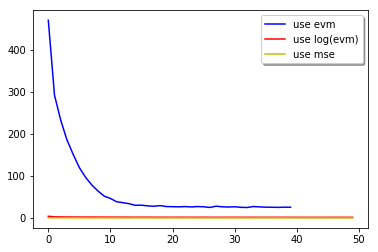

In [12]:
plt.figure(1)
fig, ax = plt.subplots(1,1)
ax.plot(history1.history['loss'], color='b', label="use evm")
ax.plot(history2.history['loss'], color='r', label="use log(evm)")
ax.plot(history3.history['loss'], color='y', label="use mse")
legend = ax.legend(loc='best', shadow=True)